# Redoing Jaz' DPT scRNAseq analysis (Pre-processing done by Kelvin prior)

In [1]:
## import packages

import os
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm

In [2]:
# show current cirectory
os.getcwd()

'/Users/uqssoon/Documents/Projects/Jaz-project/notebooks'

In [3]:
# print software versions
sc.logging.print_header()

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [4]:
# print dandelion version
ddl.logging.print_header()

dandelion==0.3.2 pandas==2.0.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


In [41]:
## set fig params..

sc.settings.set_figure_params(dpi=80, facecolor= "white")

Pre-processing to concatenate all raw files from cellranger here (done by Kelvin) - do not run this.

In [ ]:
#### Pre-processing has been done by Kelvin in his notebooks

#### These are steps for reading in the raw data - don't run this!

#RAWFOLDER = "/QRISdata/Q5688/GONZ-0001_run2/count"
# also specify the names of the folders (sans _GEX for simplicity)
#samples = [
    "CD4_L01",
    "CD4_P01",
    "CD4_WY",
    "CD8_L01",
    "CD8_P01",
    "CD8_WY",
    "DP_L01",
    "DP_P01",
    "DP_WY",
    "V_CD4",
    "V_CD8",
    "V_DP",
#]

# each is an individual run where it is donor_celltype, so 4 donors, 3 celltypes per donor

### use a for-loop to read in files, add them to a list and concatenate them

#from pathlib import Path

#adata_list = []  # create an empty list first
#for sample in tqdm(samples):
    # we will use Path to construct the path to the 10x file
    # you can also just use
    # file_path = "/QRISdata/Q5688/GONZ-0001/count/" + sample + "_GEX/outs/filtered_feature_bc_matrix.h5"
    # exactly the same
    #file_path = (
    #    Path(RAWFOLDER) / (sample + "_GEX") / "outs" / "filtered_feature_bc_matrix.h5"
    #)
    #tmp = sc.read_10x_h5(file_path)
    #tmp.var_names_make_unique()
    # update the metadata with the sample folder info
    #tmp.obs["sample"] = sample
    #if sample.split("_")[0] == "V":                  ### splitting string by "_" and selecting the first string, eg V_CD4, it will write in "sort.type" as CD4
    #    tmp.obs["sort_type"] = sample.split("_")[
    #        1
    #    ]  # split based on _ and select the second
    #    tmp.obs["donor"] = sample.split("_")[0]  # split based on _ and select the first     ### splitting string by "_" and selecting the zeroth string, eg V_CD4, it will write in "donor" as V
    #else:                  ## for every other sample that where sample.split("_")[0] does not equal V, eg CD4_L01
    #    tmp.obs["sort_type"] = sample.split("_")[                   #in this case, take zeroth string and add to sort type, so here, CD4 will be added
    #        0
    #    ]  # split based on _ and select the first
    #    tmp.obs["donor"] = sample.split("_")[                       #in this case, take first string and add to donor, so here, L01 will be added
    #        1
    #    ]  # split based on _ and select the second
    #### adjust the cell barcode name so that there won't be duplicates later
    #tmp.obs_names = [sample + "_" + n for n in tmp.obs_names]
    # generate some QC metrics
   ##### tmp.var["mt"] = tmp.var_names.str.startswith(
        "MT-"
    #)  # annotate the group of mitochondrial genes as 'mt'
    #sc.pp.calculate_qc_metrics(
    #    tmp, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
    #)
    ###### dandelion has a quick recipe function to quickly mark doublets and bad quality cells
    #ddl.pp.external.recipe_scanpy_qc(
    #    tmp, max_genes=10000, mito_cutoff=None, mito_startswith="MT-"
    #)
    ##### ok now append the list to include each file
    #adata_list.append(tmp)



#########concatenate
# adata = adata_list[0].concatenate(adata_list[1:], index_unique=None)               #you are selecting the zeroth adata, and then concatenating it with with the first and so on until the end
# keep only relevant columns in part of the object
#adata.var = adata.var[["gene_ids", "feature_types", "genome", "mt"]]      #feature types is from features.rsv - usually for multimodal data, here we only have genes so "Gene expression" is the only feature
#adata

The different data file: 

1. raw data before ANY filtering
"raw_adata_v2.h5ad"

2. processed data after filtering and HV gene calculation
"adata_processed_v2.h5ad"

3. processed data after filtering, HV gene calculation and BBKNN batch correction
"adata_processed_bbknn_v2.h5ad"

Kelvin also did some quick check of T cells scores for quick annotation using -cell typist

4. After everything, he added TCR to get ready for Dandelion
"adata_processed_v2_tcr.h5ad"

In [8]:
##### I am going to strat from the concatenated raw datafile... 

# first connect to the path - because files are stored in RDM - make sure you are on UQ network either directly or via VPN

from pathlib import Path
out_path = Path("/Volumes/KTDDL23-Q5935/scDPT/") / "kelvin" / "h5ad"
#alternative: out_path = Path("/Volumes/KTDDL23-Q5935/scDPT/kelvin/h5ad")

In [34]:
#read in data folder

adata = sc.read_h5ad(out_path/"raw_adata_v2.h5ad")

In [10]:
adata
#### note: this adata has gone through some pre-processing CALCULATIONS but have NOT been filtered... 

AnnData object with n_obs × n_vars = 116772 × 36601
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt'
    uns: 'filter_rna_colors'

# Quality control


These are the steps that Kelvin did to obtain some PP parameters AFTER concatenating raw output from cell ranger, BEFORE saving it as "raw_adata_v2.h5ad"

When Kelvin ran 
`ddl.pp.external.recipe_scanpy_qc(
        tmp, max_genes=10000, mito_cutoff=None, mito_startswith="MT-"
)`, he applied a quick "recipe" function from ddl to help compute PP output using these parameters in this context: {cells need to have 10,000 genes, and no mito_cutoff done}. It uses a gmm model (whatever this is) to decide which cells pass or not.. 

It then creates a "filter_rna" column to store the final outoput, whether a cell passes QC (False), or not (True). 




In [35]:
## to quickly look at our metadata:
adata.obs #observational file (for cells)
#adata.var #variable level (for genes)

sample sort_type donor  n_genes_by_counts  \
CD4_L01_AAACCTGAGAACTGTA-1  CD4_L01       CD4   L01                986   
CD4_L01_AAACCTGAGAGCTATA-1  CD4_L01       CD4   L01                722   
CD4_L01_AAACCTGAGGAGCGAG-1  CD4_L01       CD4   L01                562   
CD4_L01_AAACCTGAGGCAGTCA-1  CD4_L01       CD4   L01                507   
CD4_L01_AAACCTGAGTCAAGCG-1  CD4_L01       CD4   L01                602   
...                             ...       ...   ...                ...   
V_DP_TTTGTCAGTTCGTGAT-1        V_DP        DP     V                536   
V_DP_TTTGTCATCAGCTTAG-1        V_DP        DP     V                496   
V_DP_TTTGTCATCCTTGCCA-1        V_DP        DP     V                439   
V_DP_TTTGTCATCGCCATAA-1        V_DP        DP     V                540   
V_DP_TTTGTCATCTTGTTTG-1        V_DP        DP     V                359   

                            total_counts  total_counts_mt  pct_counts_mt  \
CD4_L01_AAACCTGAGAACTGTA-1        2347.0             13.0       0.553899   
CD4_L01_AAACCTGAGAGCTATA-1        1726.0             14.0       0.811124   
CD4_L01_AAACCTGAGGAGCGAG-1        1443.0             15.0       1.039501   
CD4_L01_AAACCTGAGGCAGTCA-1        1141.0              4.0       0.350570   
CD4_L01_AAACCTGAGTCAAGCG-1        1410.0             16.0       1.134752   
...                                  ...              ...            ...   
V_DP_TTTGTCAGTTCGTGAT-1           1355.0             13.0       0.959410   
V_DP_TTTGTCATCAGCTTAG-1           1067.0              1.0       0.093721   
V_DP_TTTGTCATCCTTGCCA-1           1000.0              0.0       0.000000   
V_DP_TTTGTCATCGCCATAA-1           1165.0              0.0       0.000000   
V_DP_TTTGTCATCTTGTTTG-1            896.0              0.0       0.000000   

                            scrublet_score  n_genes  \
CD4_L01_AAACCTGAGAACTGTA-1        0.182979      986   
CD4_L01_AAACCTGAGAGCTATA-1        0.456193      722   
CD4_L01_AAACCTGAGGAGCGAG-1        0.156962      562   
CD4_L01_AAACCTGAGGCAGTCA-1        0.216129      507   
CD4_L01_AAACCTGAGTCAAGCG-1        0.408219      602   
...                                    ...      ...   
V_DP_TTTGTCAGTTCGTGAT-1           0.220339      536   
V_DP_TTTGTCATCAGCTTAG-1           0.163418      496   
V_DP_TTTGTCATCCTTGCCA-1           0.211679      439   
V_DP_TTTGTCATCGCCATAA-1           0.220339      540   
V_DP_TTTGTCATCTTGTTTG-1           0.104972      359   

                            gmm_pct_count_clusters_keep is_doublet filter_rna  \
CD4_L01_AAACCTGAGAACTGTA-1                        False      False       True   
CD4_L01_AAACCTGAGAGCTATA-1                         True      False      False   
CD4_L01_AAACCTGAGGAGCGAG-1                         True      False      False   
CD4_L01_AAACCTGAGGCAGTCA-1                         True      False      False   
CD4_L01_AAACCTGAGTCAAGCG-1                         True      False      False   
...                                                 ...        ...        ...   
V_DP_TTTGTCAGTTCGTGAT-1                           False      False       True   
V_DP_TTTGTCATCAGCTTAG-1                           False      False       True   
V_DP_TTTGTCATCCTTGCCA-1                            True      False      False   
V_DP_TTTGTCATCGCCATAA-1                            True      False      False   
V_DP_TTTGTCATCTTGTTTG-1                            True      False      False   

                           batch  
CD4_L01_AAACCTGAGAACTGTA-1     0  
CD4_L01_AAACCTGAGAGCTATA-1     0  
CD4_L01_AAACCTGAGGAGCGAG-1     0  
CD4_L01_AAACCTGAGGCAGTCA-1     0  
CD4_L01_AAACCTGAGTCAAGCG-1     0  
...                          ...  
V_DP_TTTGTCAGTTCGTGAT-1       11  
V_DP_TTTGTCATCAGCTTAG-1       11  
V_DP_TTTGTCATCCTTGCCA-1       11  
V_DP_TTTGTCATCGCCATAA-1       11  
V_DP_TTTGTCATCTTGTTTG-1       11  

[116772 rows x 13 columns]

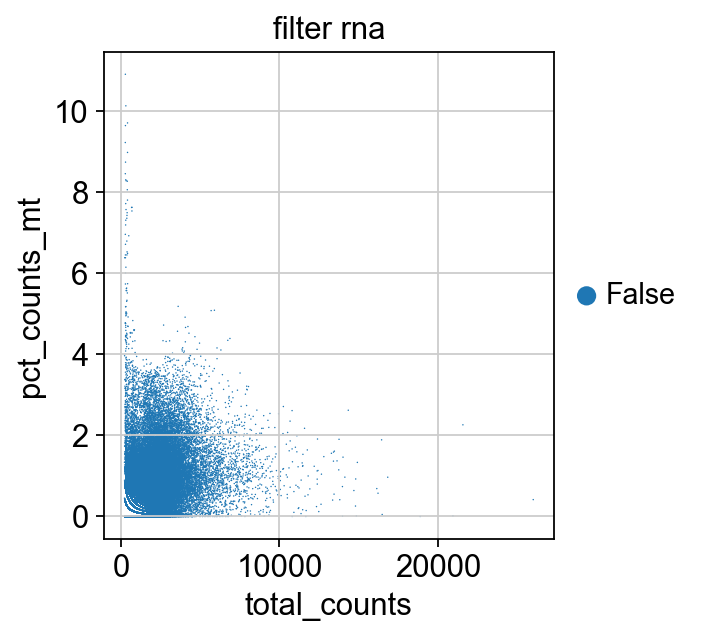

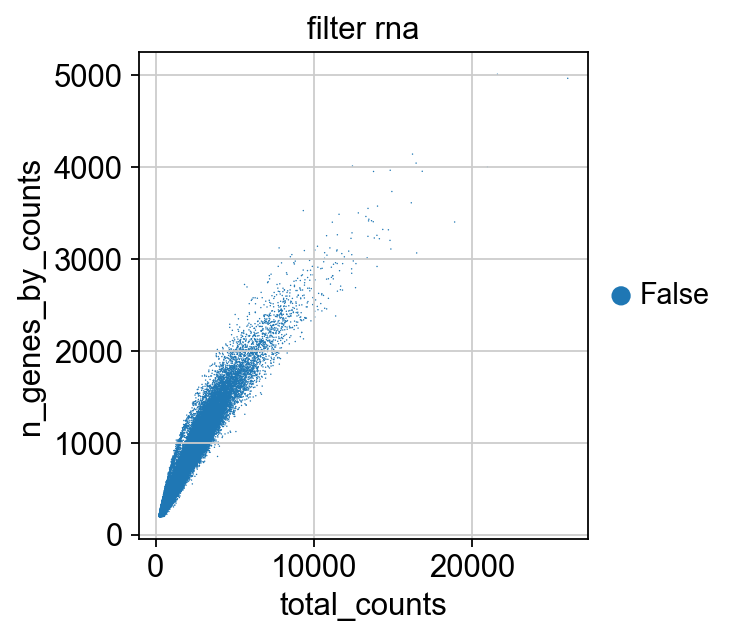

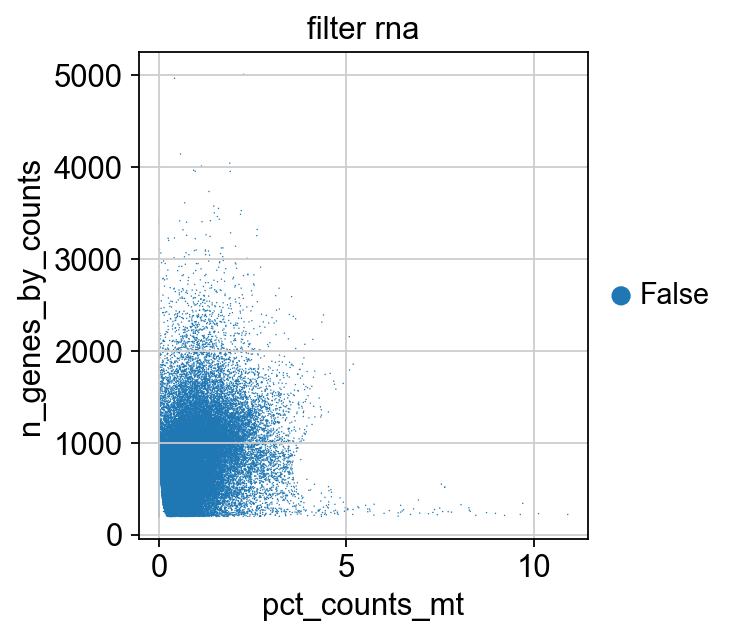

In [117]:
# Now let's visualise some QC metrics

sc.pl.scatter(adata, x = "total_counts", y= "pct_counts_mt", color= "filter_rna")
sc.pl.scatter(adata, x = "total_counts", y = "n_genes_by_counts", color = "filter_rna")
sc.pl.scatter(adata, x = "pct_counts_mt", y = "n_genes_by_counts", color = "filter_rna")

# n_genes_by_counts = number of genes with positive counts in a cell (similar to nFeature_RNA in seurat)
# total_counts = total number of counts for a cell, which is also known as library size (similar to nCount_RNA in seurat = nUMI)

In [118]:
###### Tabulate number of cells per sample... 

# tabulate # of the cells that can be analysed (false is good here)
pd.crosstab(adata.obs["sample"], adata.obs["filter_rna"])

#cross tab: https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
# https://pbpython.com/pandas-crosstab.html


############## 
# Here, I can see that for CD4 sample, "V" is potentially crappy?
# For CD8: "L01" is bad
# For DP: All are potentially bad.. 


filter_rna  False
sample           
CD4_L01      9950
CD4_P01      8115
CD4_WY      11674
CD8_L01      1328
CD8_P01      6659
CD8_WY       9440
DP_L01       1765
DP_P01       5074
DP_WY        1967
V_CD4        3605
V_CD8        6277
V_DP         5710

In [23]:
## redo this as percentage
# Basically you just have the function that does row/row.sum(), and you use apply with axis=1 to apply it by row.
pd.crosstab(adata.obs["sample"], adata.obs["filter_rna"]).apply(
    lambda row: row/row.sum() * 100, axis = 1 
)

filter_rna      False       True
sample                          
CD4_L01     87.380346  12.619654
CD4_P01     67.596835  32.403165
CD4_WY      96.375795   3.624205
CD8_L01     14.032122  85.967878
CD8_P01     75.825552  24.174448
CD8_WY      83.076652  16.923348
DP_L01      26.481620  73.518380
DP_P01      60.211226  39.788774
DP_WY       29.902706  70.097294
V_CD4       31.144708  68.855292
V_CD8       64.116445  35.883555
V_DP        66.218254  33.781746

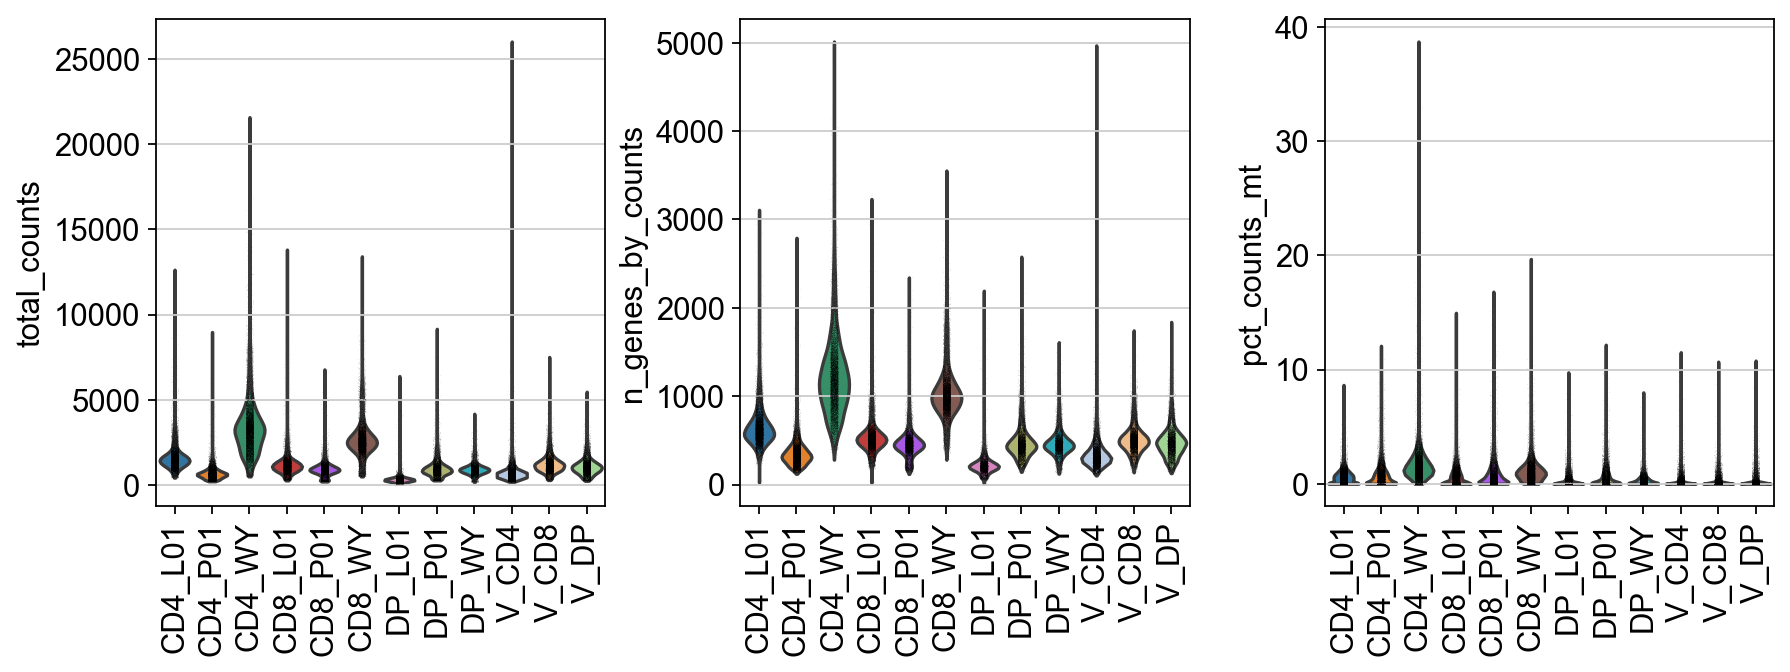

In [37]:
## Should try to plot vln plots for QC metrics too
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='sample', multi_panel = True, rotation = 90)

Continue processing with "good" cells only.. 

In [38]:
adata = adata[adata.obs["filter_rna"] == "False"].copy()

############## Things to ask Kelvin - why don't get mito cutoff to <5?


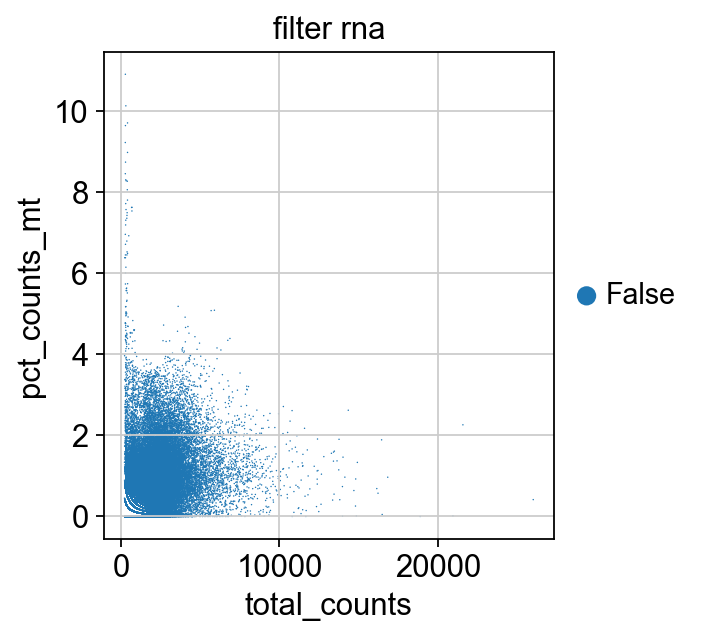

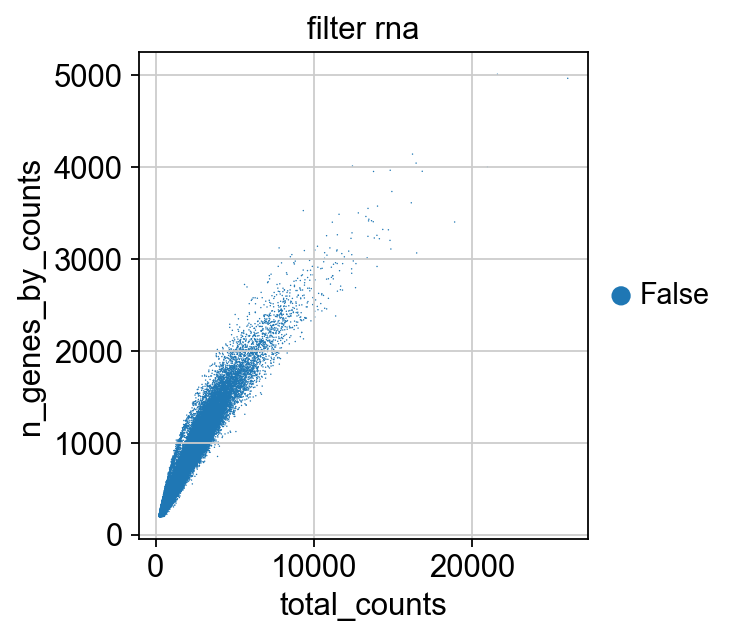

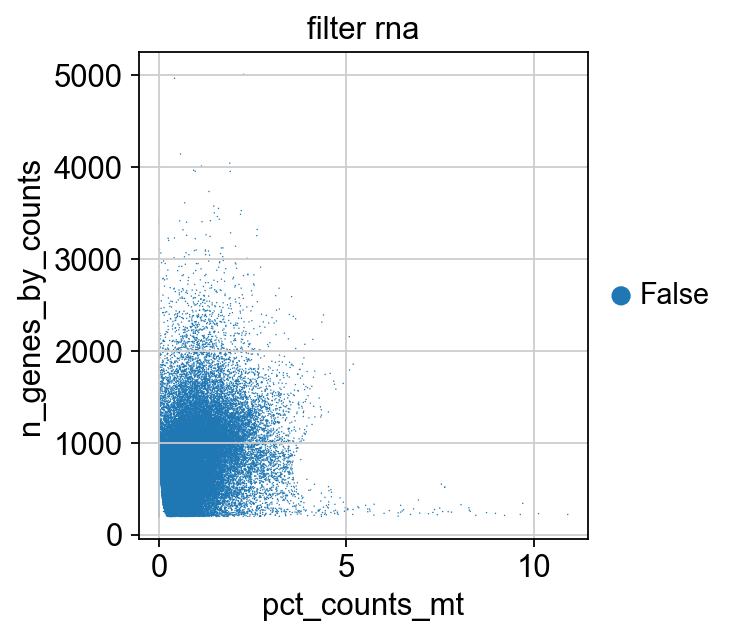

In [39]:
# Redo QC oplots
sc.pl.scatter(adata, x = "total_counts", y= "pct_counts_mt", color= "filter_rna")
sc.pl.scatter(adata, x = "total_counts", y = "n_genes_by_counts", color = "filter_rna")
sc.pl.scatter(adata, x = "pct_counts_mt", y = "n_genes_by_counts", color = "filter_rna")

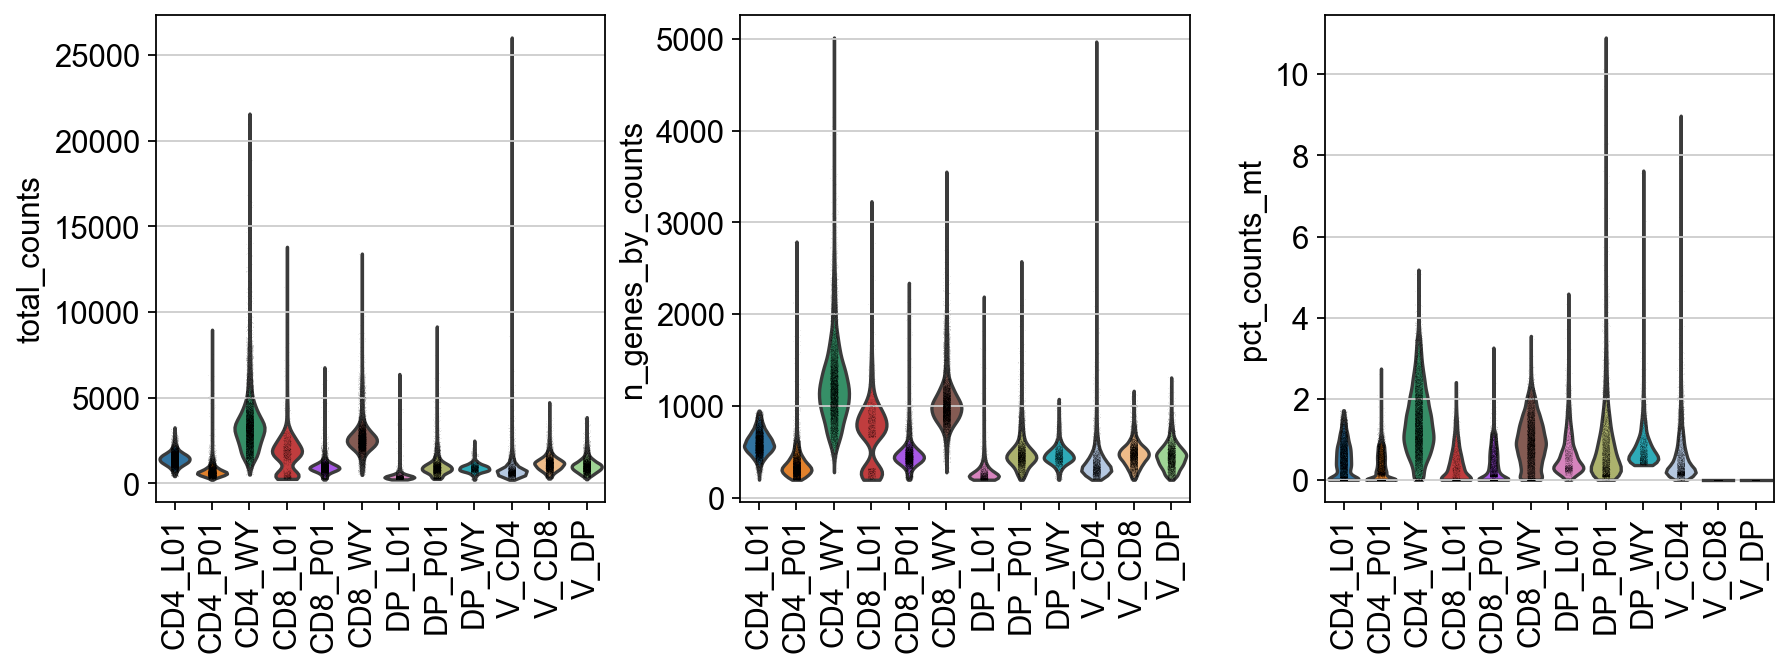

In [42]:
# also violin plot

sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='sample', multi_panel = True, rotation = 90)

In [44]:
# maybe just do cutoff and see what happens... 
bdata = adata
bdata

AnnData object with n_obs × n_vars = 71564 × 36601
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt'
    uns: 'filter_rna_colors', 'sample_colors'

In [49]:
bdata = bdata[bdata.obs.pct_counts_mt <5, :]
bdata #71511
# I also want to filter out cells with low gene expression.. 
bdata = bdata[bdata.obs.n_genes_by_counts > 200, :]
bdata #71460

View of AnnData object with n_obs × n_vars = 71460 × 36601
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt'
    uns: 'filter_rna_colors', 'sample_colors'

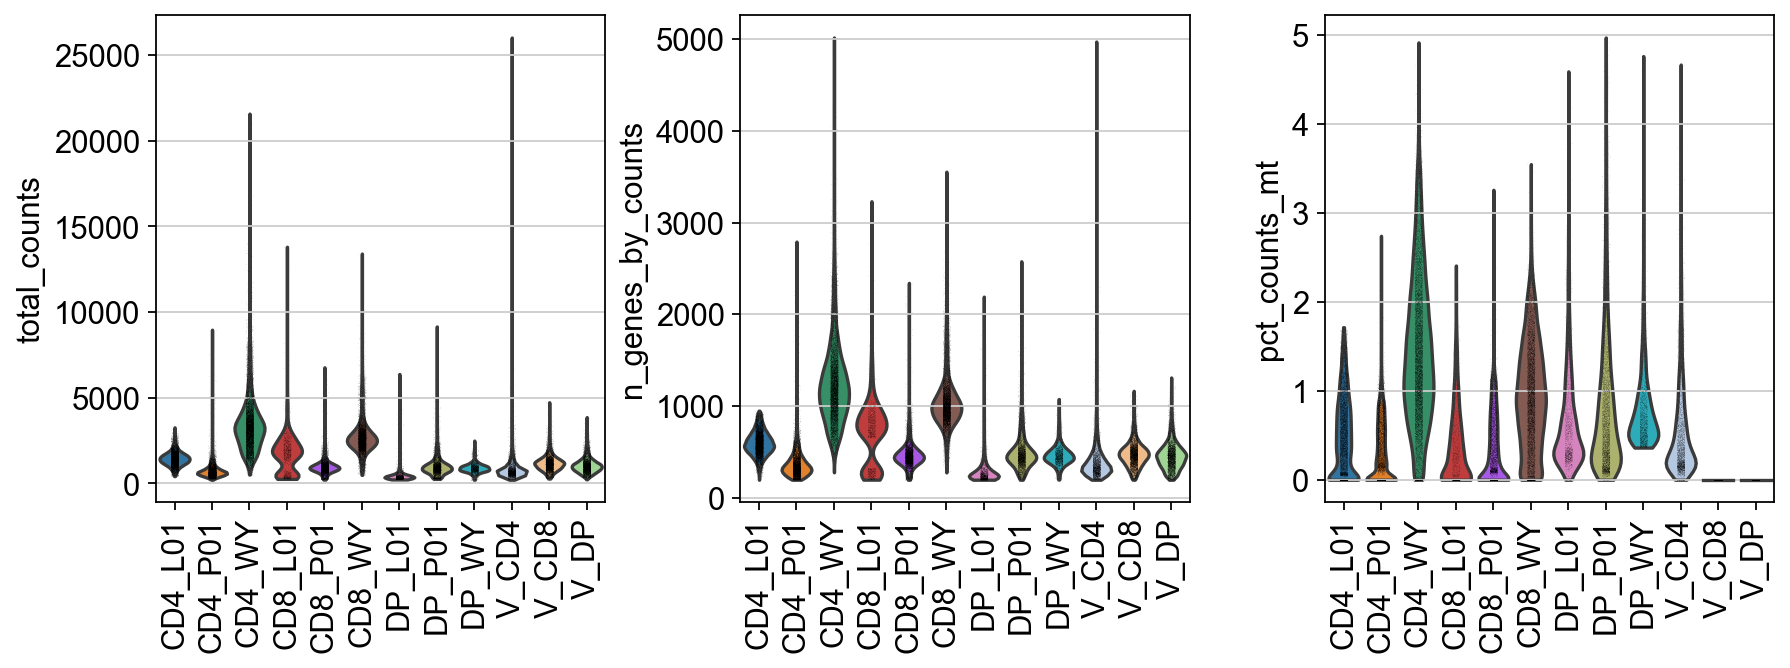

In [50]:
# also violin plot

sc.pl.violin(bdata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='sample', multi_panel = True, rotation = 90)

In [52]:
########### Anyway let's go back to the original data... adata

# remove uninformative genes for now - this filters out genes that are not expressed in least 3 cells.
sc.pp.filter_genes(adata, min_cells=3)
adata    # 71561 cells, 21591 genes


AnnData object with n_obs × n_vars = 71564 × 21591
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells'
    uns: 'filter_rna_colors', 'sample_colors'

## NORMALISATION

In [53]:
# Total-count normalize (library-size correct) the data matrix 𝐗 to 10,000 reads per cell, so that counts become comparable among cells.
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data:
sc.pp.log1p(adata)


## Highly variable Genes

In [60]:
# Identify highly-variable genes.
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata

AnnData object with n_obs × n_vars = 71564 × 21591
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'filter_rna_colors', 'sample_colors', 'log1p', 'hvg'

In [59]:
# to see genes
adata.var   #there is now a hvg column

gene_ids    feature_types  genome     mt  n_cells  \
AL627309.1  ENSG00000238009  Gene Expression  GRCh38  False       28   
AL627309.5  ENSG00000241860  Gene Expression  GRCh38  False       14   
LINC01409   ENSG00000237491  Gene Expression  GRCh38  False     1119   
FAM87B      ENSG00000177757  Gene Expression  GRCh38  False        9   
LINC01128   ENSG00000228794  Gene Expression  GRCh38  False     1500   
...                     ...              ...     ...    ...      ...   
AL354822.1  ENSG00000278384  Gene Expression  GRCh38  False       84   
AL592183.1  ENSG00000273748  Gene Expression  GRCh38  False      738   
AC240274.1  ENSG00000271254  Gene Expression  GRCh38  False      124   
AC004556.3  ENSG00000276345  Gene Expression  GRCh38  False      782   
AC007325.4  ENSG00000278817  Gene Expression  GRCh38  False       26   

            highly_variable     means  dispersions  dispersions_norm  
AL627309.1            False  0.002955     2.668805          1.095161  
AL627309.5            False  0.001691     2.715631          1.237420  
LINC01409             False  0.107368     2.426608          0.359353  
FAM87B                False  0.001084     2.303611         -0.014320  
LINC01128             False  0.119151     2.242956         -0.198594  
...                     ...       ...          ...               ...  
AL354822.1            False  0.008451     2.423547          0.350051  
AL592183.1             True  0.073456     2.578236          0.820007  
AC240274.1            False  0.011603     2.549724          0.733385  
AC004556.3            False  0.060707     2.211048         -0.295533  
AC007325.4            False  0.003908     3.253029          2.870066  

[21591 rows x 9 columns]

In [61]:
### to get structure of dataframe
adata.var.info()
adata.obs.info()

### to get the number of HV genes... because the column "highly_variable" is a boolean vector - ie it gives True (1) or False (0), you can use sum function to know... 
print(adata.var.highly_variable.sum())    #2373 HVG genes..

<class 'pandas.core.frame.DataFrame'>
Index: 21591 entries, AL627309.1 to AC007325.4
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gene_ids          21591 non-null  object  
 1   feature_types     21591 non-null  category
 2   genome            21591 non-null  category
 3   mt                21591 non-null  bool    
 4   n_cells           21591 non-null  int64   
 5   highly_variable   21591 non-null  bool    
 6   means             21591 non-null  float64 
 7   dispersions       21591 non-null  float64 
 8   dispersions_norm  21591 non-null  float32 
dtypes: bool(2), category(2), float32(1), float64(2), int64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 71564 entries, CD4_L01_AAACCTGAGAGCTATA-1 to V_DP_TTTGTCATCTTGTTTG-1
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  ---

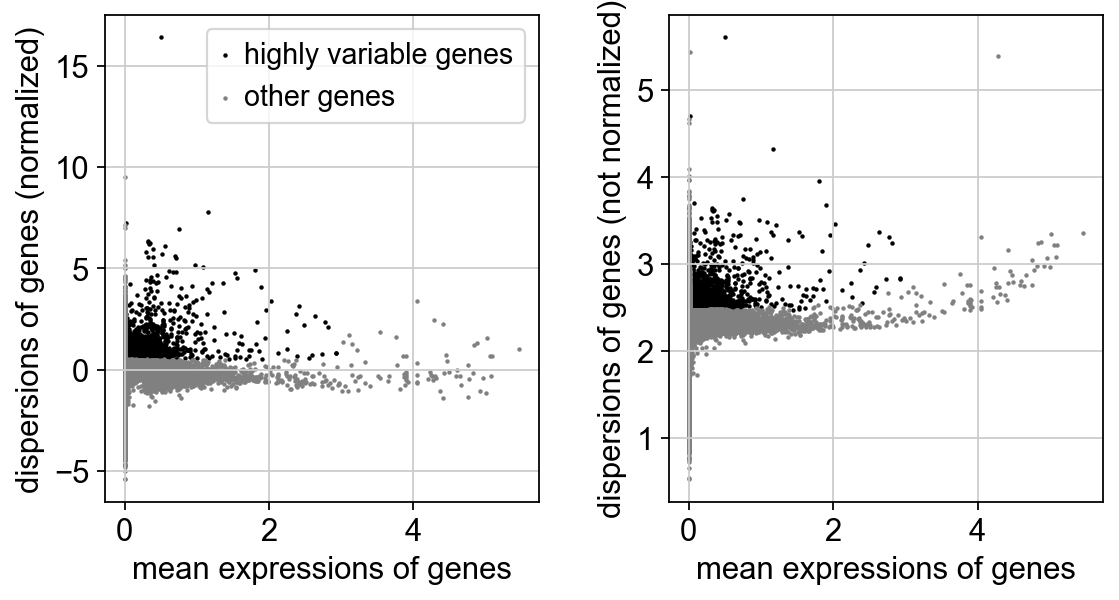

In [57]:
# PLOT IT OUT
sc.pl.highly_variable_genes(adata)

In [93]:
#### To inspect HV genes... first, create a df containing the info. 
hvg = pd.DataFrame(adata.var.highly_variable)
hvg


highly_variable
AL627309.1            False
AL627309.5            False
LINC01409             False
FAM87B                False
LINC01128             False
...                     ...
AL354822.1            False
AL592183.1             True
AC240274.1            False
AC004556.3            False
AC007325.4            False

[21591 rows x 1 columns]

In [94]:
# to know the str
pd.DataFrame.info(hvg)

<class 'pandas.core.frame.DataFrame'>
Index: 21591 entries, AL627309.1 to AC007325.4
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   highly_variable  21591 non-null  bool 
dtypes: bool(1)
memory usage: 705.8+ KB


In [95]:
# add colname 
hvg.columns = ['HV_status']
print(hvg)

            HV_status
AL627309.1      False
AL627309.5      False
LINC01409       False
FAM87B          False
LINC01128       False
...               ...
AL354822.1      False
AL592183.1       True
AC240274.1      False
AC004556.3      False
AC007325.4      False

[21591 rows x 1 columns]


In [97]:
# get only the True ones.. 
hvg_T = hvg.loc[hvg['HV_status'] == True]
hvg_T[:50]

HV_status
FAM41C           True
TNFRSF4          True
SCNN1D           True
ACAP3            True
MMP23B           True
SLC35E2A         True
DNAJC11          True
RERE             True
RERE-AS1         True
SPSB1            True
PIK3CD           True
AL357140.2       True
UBE4B            True
KIF1B            True
PEX14            True
VPS13D           True
PRDM2            True
FBXO42           True
EIF4G3           True
NIPAL3           True
AL050344.1       True
SH3BGRL3         True
ZNF683           True
EYA3             True
EPB41            True
FAM167B          True
FAM229A          True
S100PBP          True
ZMYM4            True
KIAA0319L        True
AGO4             True
AGO3             True
SNIP1            True
MACF1            True
RLF              True
AL603839.3       True
SCMH1            True
HIVEP3           True
FOXJ3            True
CCDC30           True
ST3GAL3          True
PTCH2            True
ZSWIM5           True
TESK2            True
MAST2            True
FAF1             True
EPS15            True
ZFYVE9           True
TUT4             True
DAB1             True

In [103]:
########### see all the variables here..   
%who_ls

['Path',
 'adata',
 'bdata',
 'ddl',
 'hvg',
 'hvg_T',
 'my_order',
 'os',
 'out_path',
 'pd',
 'sc',
 'tqdm']

## removing VDJ genes from HVG genes manually

In [109]:
#### Because this is 10x 5' data - there is a lot of VDJ genes that are picked up (in abundance), and because they do look different from each donor, it can be mis-computed as HVG - REMOVE THEM.

import re

for i in adata.var.index:
    if re.search("TR[AB][VDJ]^IG[HKL][VDJC]", i):
        adata.var.at[i, "highly_variable"] = False



#### It uses the re module, which stands for regular expressions, to search for specific patterns in the index values.
#Let's break down the code step by step:
#for i in adata.var.index:: This initiates a loop that iterates over each value (i) in the index of the adata.var object (assuming adata is some data structure, and var is one of its attributes).

#if re.search("TR[AB][VDJ]^IG[HKL][VDJC]", i):: This line uses regular expressions to check if the current index value (i) matches a specific pattern. Let's analyze the regular expression pattern:

#TR: Matches the characters "TR" literally.
#[AB]: Matches either "A" or "B".
#[VDJ]: Matches either "V", "D", or "J".
#^: Asserts the position at the start of the string.
#IG: Matches the characters "IG" literally.
#[HKL]: Matches either "H", "K", or "L".
#[VDJC]: Matches either "V", "D", "J", or "C".
#The regular expression is looking for index values that start with "TR", followed by either "A" or "B", then one of "V", "D", or "J", then "IG", then one of "H", "K", or "L", and finally one of "V", "D", "J", or "C".

#adata.var.at[i, "highly_variable"] = False: If the regular expression matches the current index value (i), it sets the corresponding value of "highly_variable" in the adata.var object to False.

#The purpose of this code seems to be to mark certain entries in the adata.var object as "not highly_variable" based on the matching pattern defined in the regular expression.

#It's important to note that the code snippet provided lacks context, and the actual effect of running this code may depend on the specific data structure (adata.var) and its contents. Therefore, it's crucial to understand the data and the intention behind the code before executing it. Regular expressions can be powerful tools, but they must be used with caution and tested carefully to ensure they yield the desired results.

In [110]:
# re-inspect hvg list
hvg = pd.DataFrame(adata.var.highly_variable)
hvg_T = hvg.loc[hvg['highly_variable'] == True]
hvg_T #still 2373 genes... - no difference??? 


highly_variable
FAM41C                 True
TNFRSF4                True
SCNN1D                 True
ACAP3                  True
MMP23B                 True
...                     ...
MT-ND4L                True
MT-ND4                 True
MT-CYB                 True
MAFIP                  True
AL592183.1             True

[2373 rows x 1 columns]

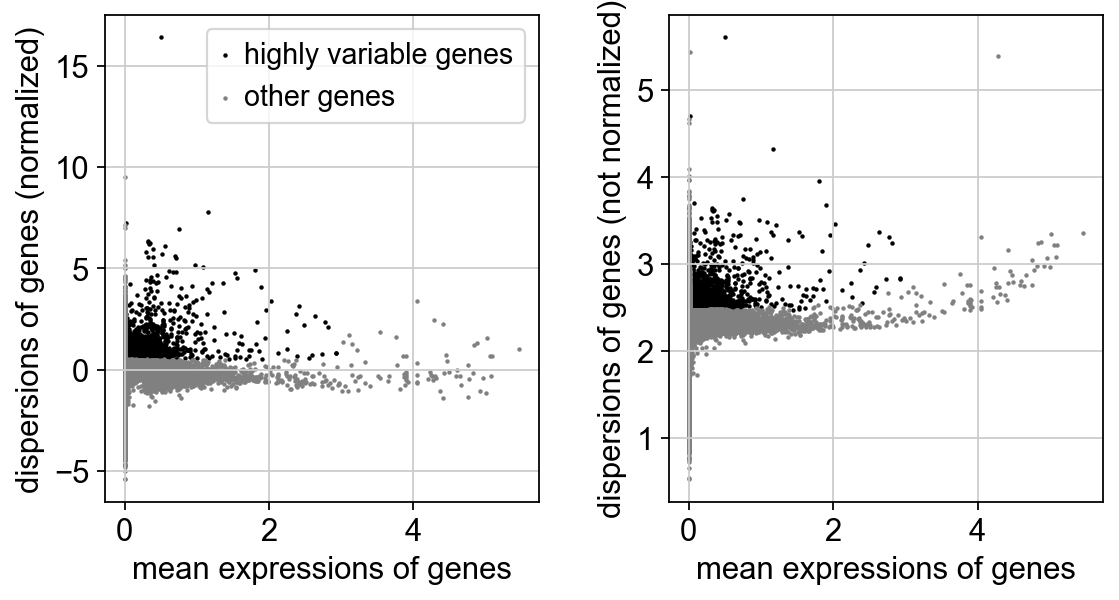

In [111]:
sc.pl.highly_variable_genes(adata)

In [112]:
# Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.
# You can get back an AnnData of the object in .raw by calling .raw.to_adata().
adata.raw = adata

# Perform Dimensionality Reduction

In [115]:
# Actually do the filtering for PCA
adata = adata[:,adata.var.highly_variable].copy()        # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself 
adata


AnnData object with n_obs × n_vars = 71564 × 2373
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'filter_rna_colors', 'sample_colors', 'log1p', 'hvg'

In [116]:
# regress out effects of total counts per cell and percentage of mt genes expressed. 
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

In [119]:
#scale each gene to unit variance. Clip values exceeding std of 10. 
sc.pp.scale(adata, max_value = 10)


In [120]:
## get PCA
sc.tl.pca(adata, svd_solver="arpack")

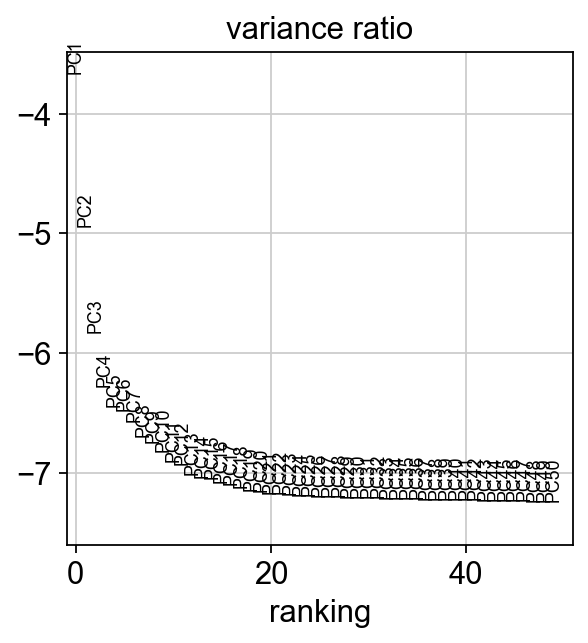

In [121]:
# get elbow plot to see variance contribution by each pc
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [122]:
## Computing neighbourhood graph - here UMAP
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs=40)
## n_neighbor: The size of local neighborhood (in terms of number of neighboring data
#points) used for manifold approximation. Larger values result in more
#global views of the manifold, while smaller values result in more local
#data being preserved. In general values should be in the range 2 to 100.
#If `knn` is `True`, number of nearest neighbors to be searched. If `knn`
#is `False`, a Gaussian kernel width is set to the distance of the
#`n_neighbors` neighbor.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [123]:
# compute UMAP
sc.tl.umap(adata, min_dist=0.3) # 0.3 is personal preference

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


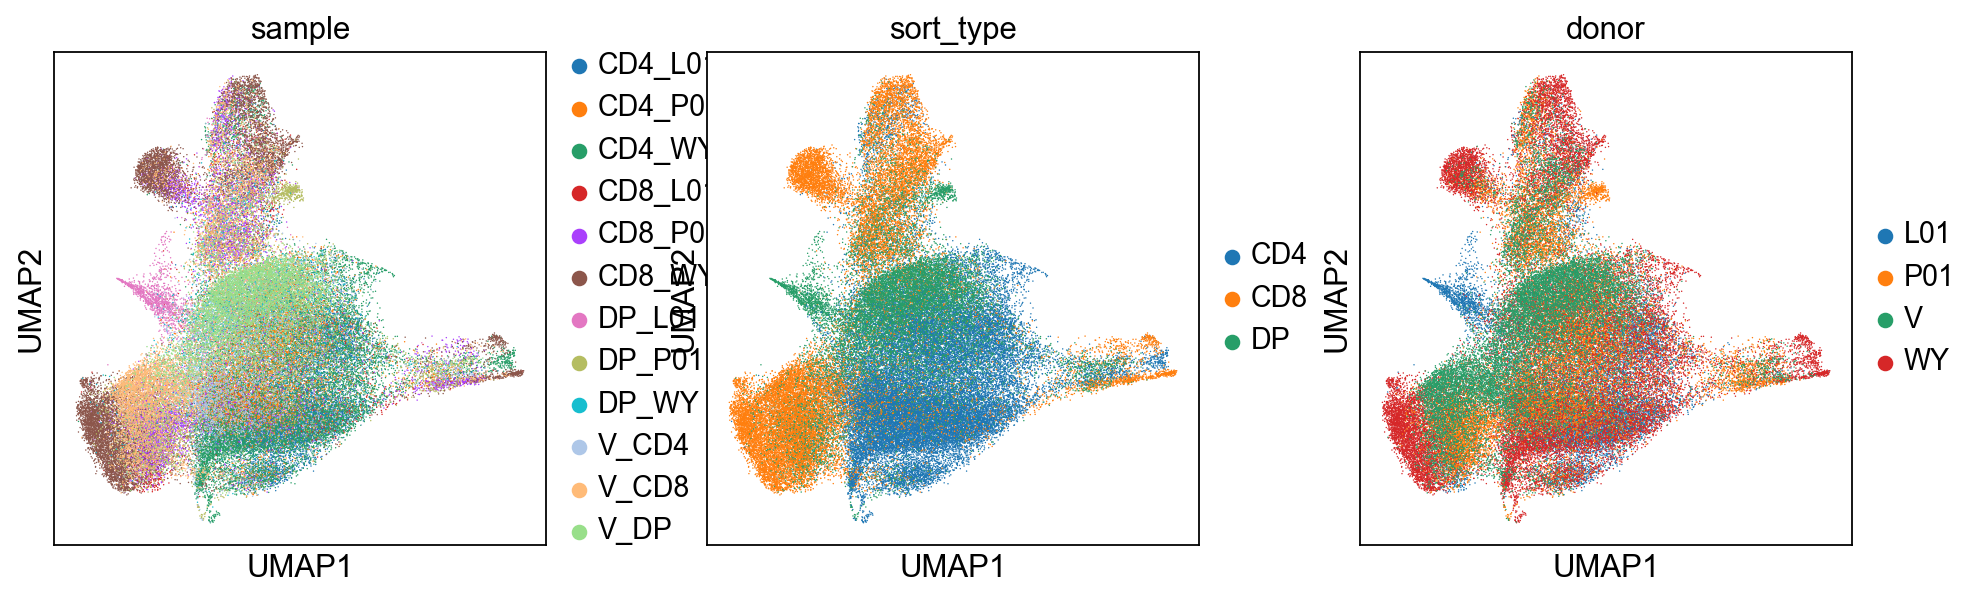

In [125]:
# visualise umap
sc.pl.umap(
    adata,
    color=[
        "sample",
        "sort_type",
        "donor",
    ],
)

In [161]:
## https://github.com/scverse/scanpy/issues/955
def cluster_small_multiples(adata, clust_key, size=30, frameon=False, legend_loc=None, **kwargs):
    tmp = adata.copy()

    for i,clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype('category')
        tmp.uns[clust+'_colors'] = ['#d3d3d3', adata.uns[clust_key+'_colors'][i]]

    sc.pl.umap(tmp, groups=tmp.obs[clust].cat.categories[1:].values, color=adata.obs[clust_key].cat.categories.tolist(), size=size, frameon=frameon, legend_loc=legend_loc, **kwargs)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


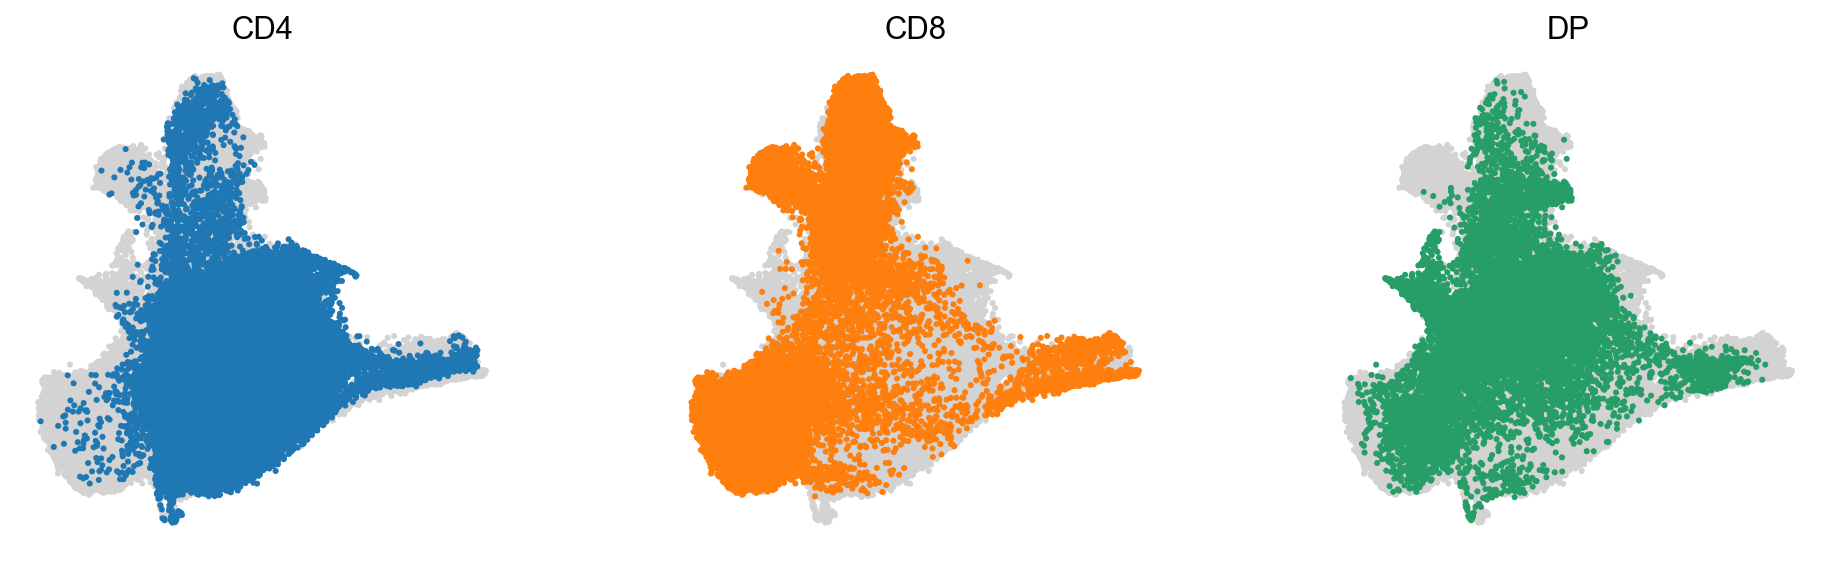

In [162]:
cluster_small_multiples(adata, 'sort_type')

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


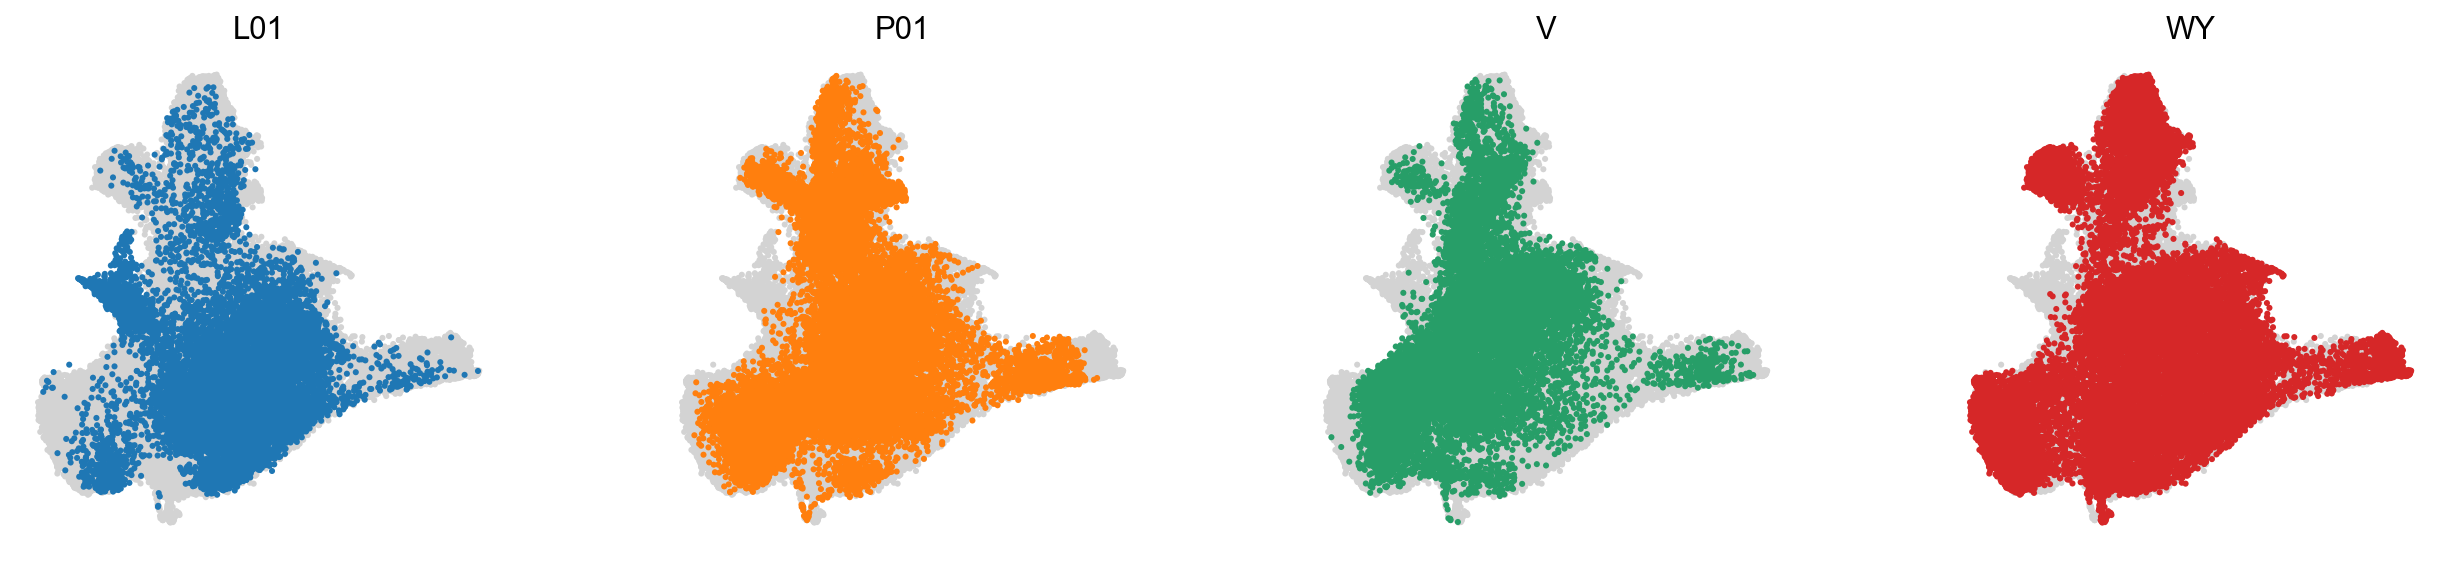

In [163]:
cluster_small_multiples(adata, 'donor')

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


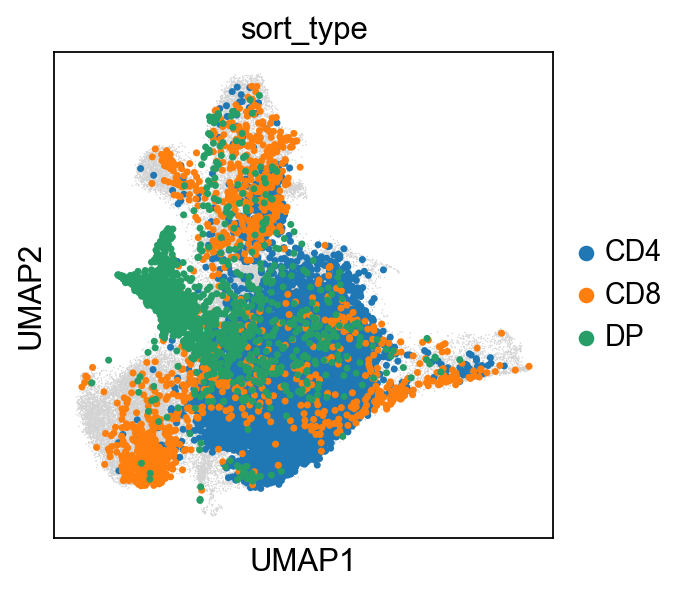

In [164]:
# https://scanpy.discourse.group/t/can-you-split-umaps-to-show-differences-between-conditions/716

from matplotlib import pyplot as plt

ax = plt.subplot()
sc.pl.umap(adata, ax=ax, show=False)
sc.pl.umap(adata[adata.obs["donor"].isin(["L01"])], color="sort_type", ax=ax, show=False, size =40)
plt.show()

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


<Axes: title={'center': 'sort_type'}, xlabel='UMAP1', ylabel='UMAP2'>

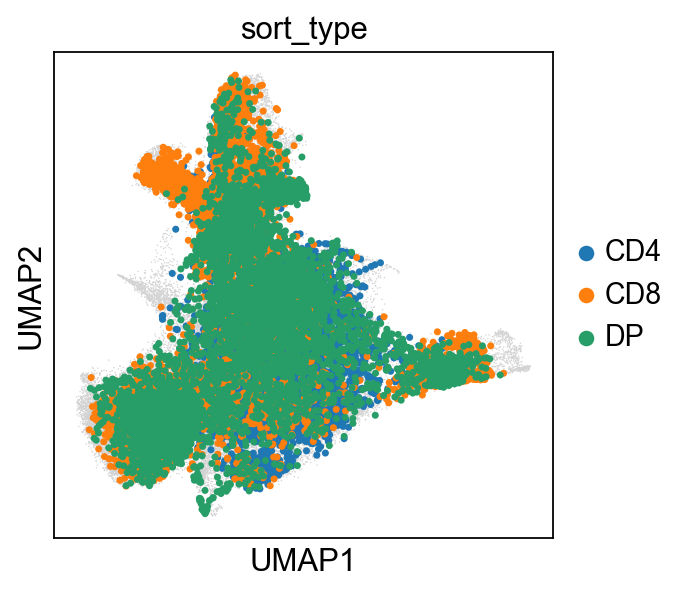

In [165]:
ax = plt.subplot()
sc.pl.umap(adata, ax=ax, show=False)
sc.pl.umap(adata[adata.obs["donor"].isin(["P01"])], color="sort_type", ax=ax, show=False, size = 40)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


<Axes: title={'center': 'sort_type'}, xlabel='UMAP1', ylabel='UMAP2'>

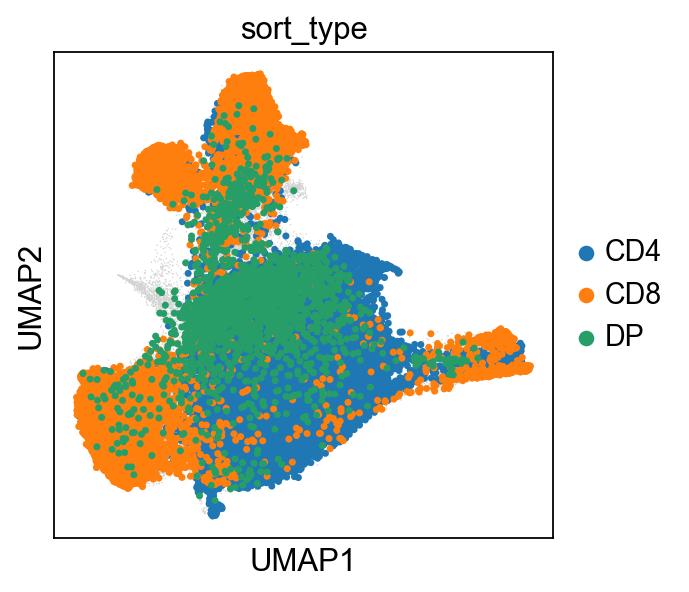

In [166]:
ax = plt.subplot()
sc.pl.umap(adata, ax=ax, show=False)
sc.pl.umap(adata[adata.obs["donor"].isin(["WY"])], color="sort_type", ax=ax, show=False, size = 40)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


<Axes: title={'center': 'sort_type'}, xlabel='UMAP1', ylabel='UMAP2'>

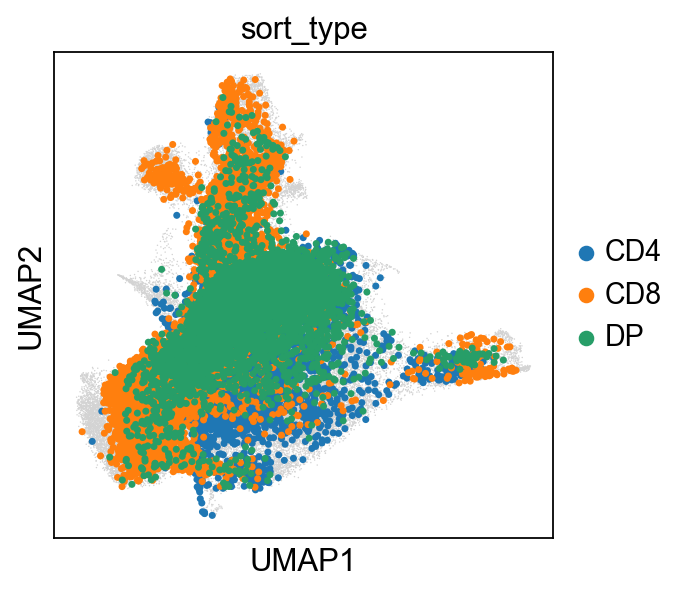

In [167]:
ax = plt.subplot()
sc.pl.umap(adata, ax=ax, show=False)
sc.pl.umap(adata[adata.obs["donor"].isin(["V"])], color="sort_type", ax=ax, show=False, size = 40)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


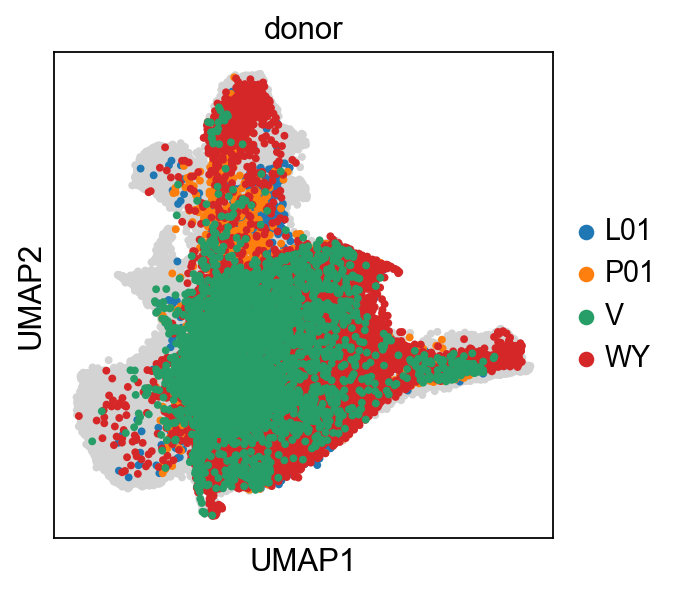

In [132]:
# https://github.com/scverse/scanpy/issues/759
ax = sc.pl.umap(adata, size=50, show=False)

sc.pl.umap(adata[adata.obs["sort_type"] == "CD4"],
           color = "donor",
           size = 50,
           ax=ax)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


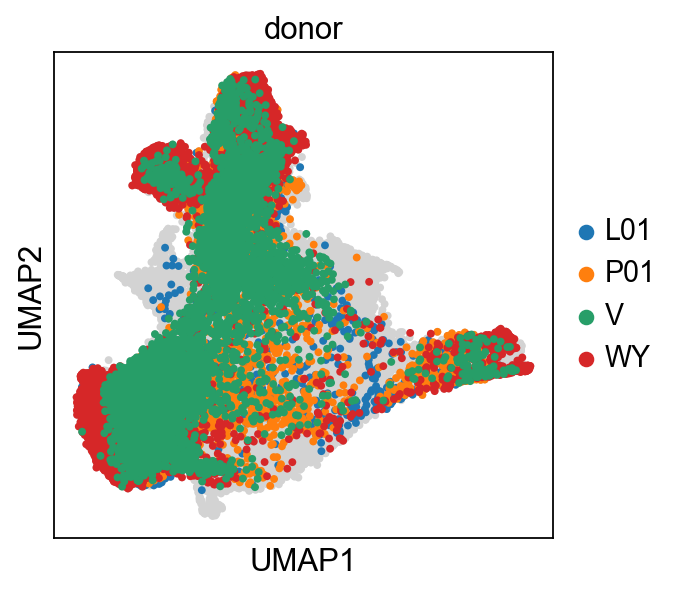

In [134]:
ax = sc.pl.umap(adata, size=50, show=False)

sc.pl.umap(adata[adata.obs["sort_type"] == "CD8"],
           color = "donor",
           size = 50,
           ax=ax)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


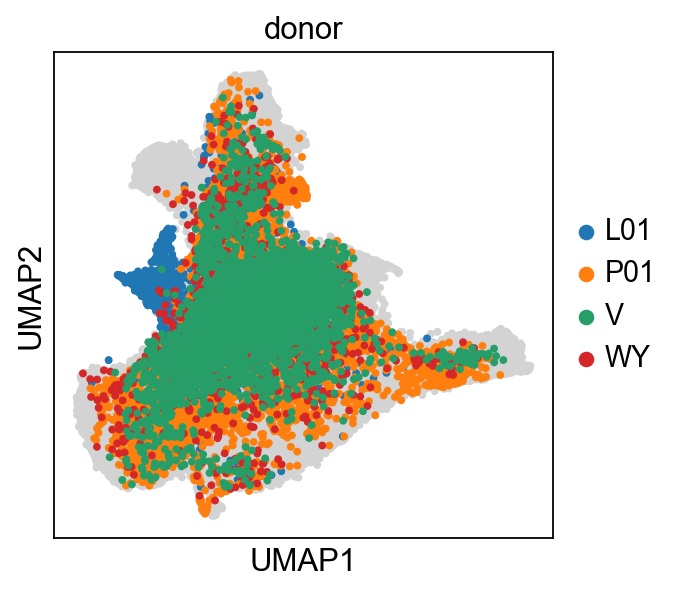

In [135]:
ax = sc.pl.umap(adata, size=50, show=False)

sc.pl.umap(adata[adata.obs["sort_type"] == "DP"],
           color = "donor",
           size = 50,
           ax=ax)

In [ ]:
##### note to self when I pick this up again: 

## CLEAN UP!
## Also do a subset of object into "CD4", "CD8", "DP" - then just check lineage markers on all to make sure what is sorted is truly only CD4, only CD8, or DP!